In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "PM10", "PM10_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       3453 non-null   datetime64[ns]
 1   PM10       2711 non-null   float64       
 2   PM10_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "PM10", "PM10_flag"]].describe()

,Time,PM10
count,3453,2711.000000
mean,2020-04-23 03:36:26.272806400,22.794050
min,2015-08-01 00:00:00,-200.212489
25%,2017-12-11 00:00:00,14.620674
50%,2020-04-22 00:00:00,21.036472
75%,2022-09-02 00:00:00,30.054105
max,2025-01-27 00:00:00,171.763035
std,NaN,12.337863


In [7]:
def clean(x):
    if x >= 4 and x <= 400: return x
    return np.nan

In [8]:
dfDay["PM10"] = dfDay["PM10"].apply(clean)

In [9]:
dfDay["PM10"].describe()

count    2678.000000
mean       23.132756
std        11.394023
min         4.044163
25%        14.875719
50%        21.191335
75%        30.121172
max       171.763035
Name: PM10, dtype: float64

In [10]:
dfDay.loc[dfDay["PM10_flag"] != "OK", "PM10"] = np.nan

In [11]:
dfDay[dfDay["PM10_flag"] != "OK"]["PM10"].info()

<class 'pandas.core.series.Series'>
Index: 829 entries, 0 to 3437
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 13.0 KB


In [12]:
dfDay["PM10"].describe()

count    2620.000000
mean       23.201138
std        11.393025
min         4.122625
25%        14.950911
50%        21.232840
75%        30.176627
max       171.763035
Name: PM10, dtype: float64

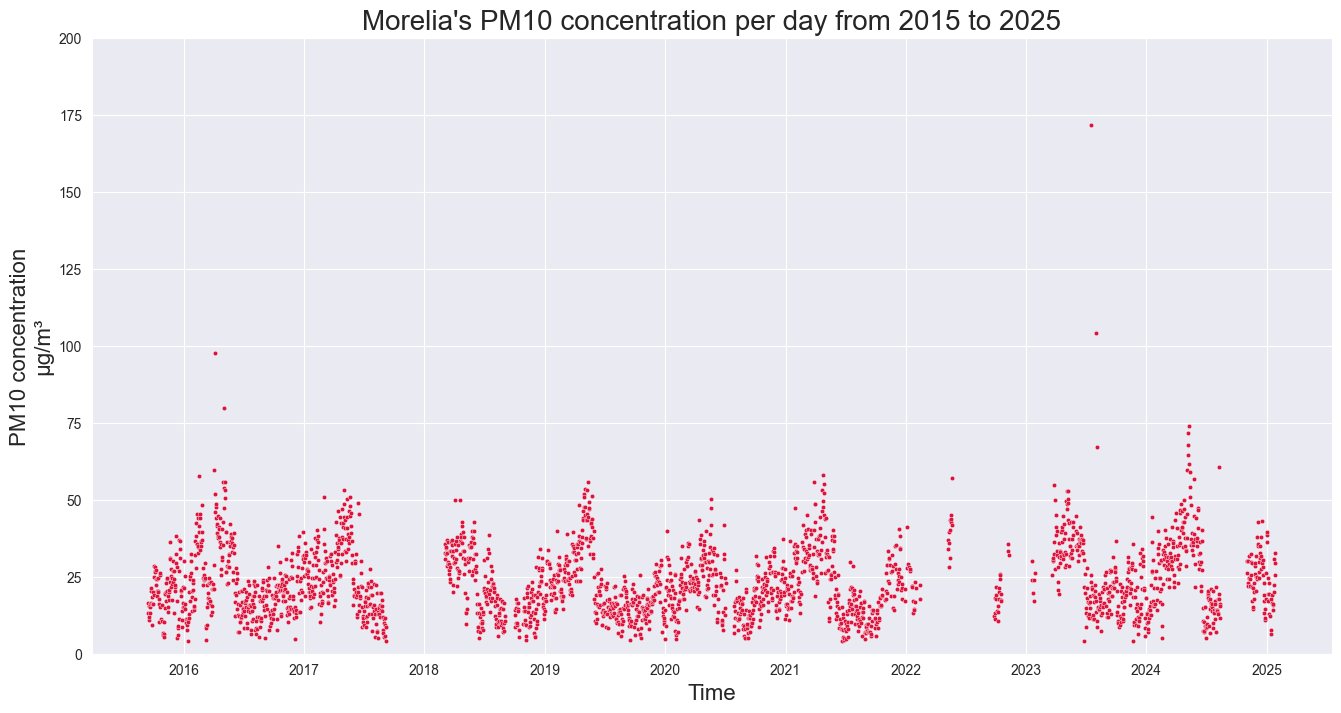

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["PM10"], s=10, color="crimson")
plt.ylim(0, 200)
plt.ylabel("PM10 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM10 concentration per day from 2015 to 2025", size=20)
plt.show()

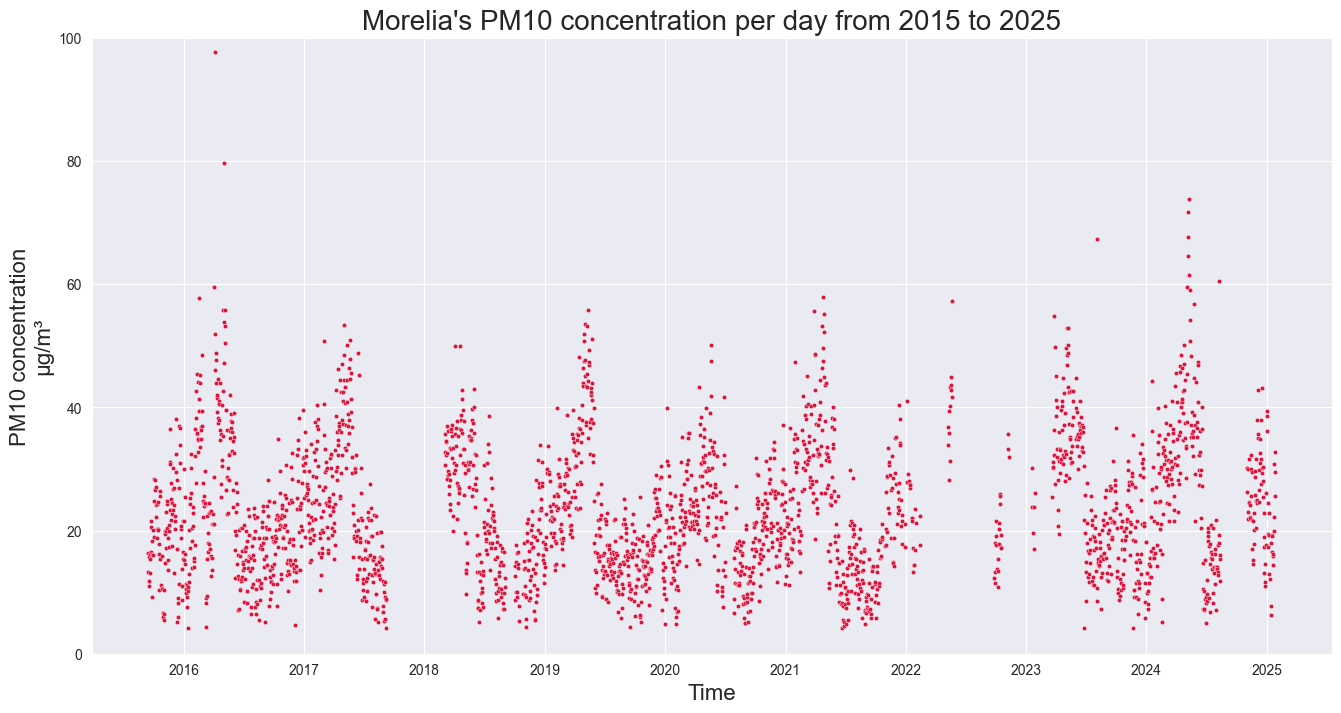

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["PM10"], s=10, color="crimson")
plt.ylim(0, 100)
plt.ylabel("PM10 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM10 concentration per day from 2015 to 2025", size=20)
plt.show()